# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 597
['port-aux-francais', "st. john's", 'hithadhoo', 'edinburgh of the seven seas', 'weno', 'tobi village', 'lodja', 'puerto baquerizo moreno', 'sandnessjoen', 'anadyr', 'port elizabeth', 'vitoria da conquista', 'blackmans bay', 'changji', 'new kingman-butler', 'luena', 'waitangi', 'tiksi', 'kodinsk', 'kattivakkam', 'maitum', 'cidade velha', 'rio grande', 'avarua', 'yellowknife', 'mccook', 'bethel', 'aragarcas', 'haenam', 'sakata', 'kirkland lake', 'holualoa', 'taiohae', 'igarka', 'kailua-kona', 'adamstown', 'perg', 'papatowai', 'oroqen zizhiqi', 'rongelap', 'grytviken', 'ilulissat', 'figuig (centre)', 'muynoq', 'olonkinbyen', 'atafu village', 'subaykhan', 'ketchikan', 'aasiaat', 'palikir - national government center', 'live oak', 'saint-philippe', 'constantia', 'labrador city', 'maxixe', 'novaya igirma', 'usinsk', 'kone', 'the pas', 'gobo', 'hermanus', 'guerrero negro', 'albany', 'puerto ayora', 'afaahiti', 'bilibino', 'port alfred', 'kununurra', 'punta a

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=imperial&appid={weather_api_key}" #YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | tobi village
City not found. Skipping...
Processing Record 7 of Set 1 | lodja
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | sandnessjoen
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | vitoria da conquista
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | changji
Processing Record 15 of Set 1 | new kingman-butler
Processing Record 16 of Set 1 | luena
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | kodinsk
Processing Record 20 of Set 1 | kattivakkam
Processing Record 21 of Set 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,46.87,99,100,19.17,TF,1743789577
1,st. john's,47.5649,-52.7093,30.27,92,100,16.11,CA,1743789578
2,hithadhoo,-0.6000,73.0833,82.72,72,91,3.51,MV,1743789579
3,edinburgh of the seven seas,-37.0676,-12.3116,66.29,92,32,11.77,SH,1743789580
4,weno,7.4515,151.8468,77.88,91,100,11.41,FM,1743789582


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/kp/Git/python-api-challenge/output_data/cities.csv", index_label="City_ID")


In [20]:
# Read saved data
city_data_df = pd.read_csv("/Users/kp/Git/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,46.87,99,100,19.17,TF,1743789577
1,st. john's,47.5649,-52.7093,30.27,92,100,16.11,CA,1743789578
2,hithadhoo,-0.6000,73.0833,82.72,72,91,3.51,MV,1743789579
3,edinburgh of the seven seas,-37.0676,-12.3116,66.29,92,32,11.77,SH,1743789580
4,weno,7.4515,151.8468,77.88,91,100,11.41,FM,1743789582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

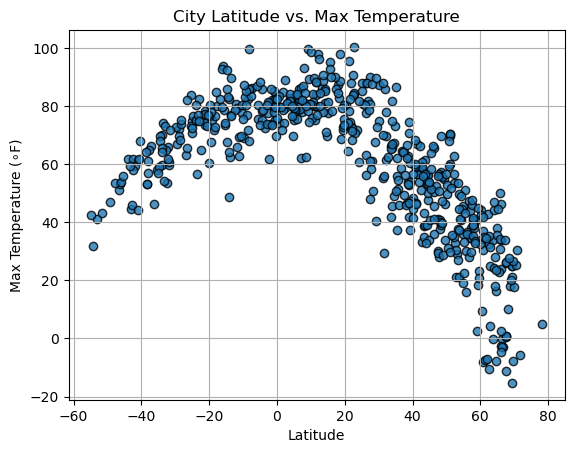

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (∘F)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kp/Git/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

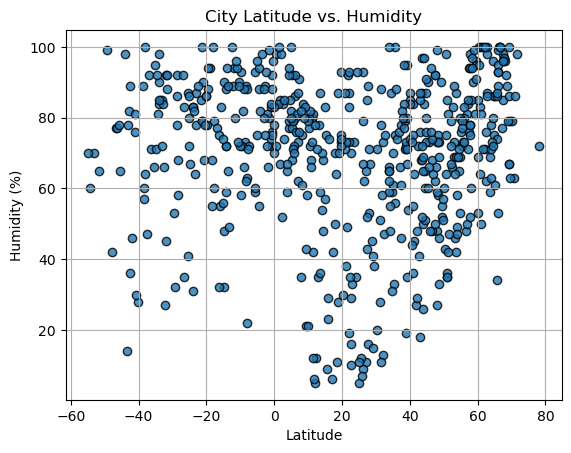

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kp/Git/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

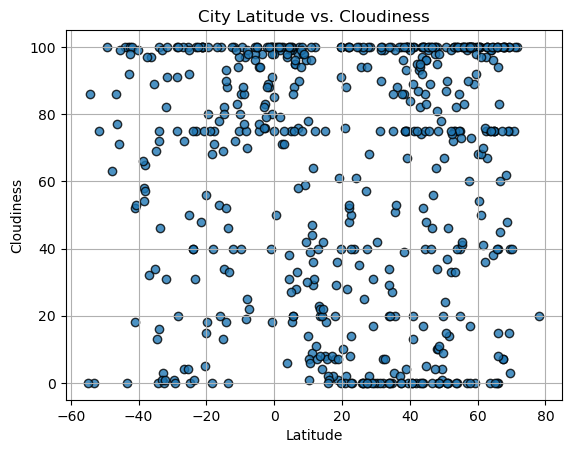

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kp/Git/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

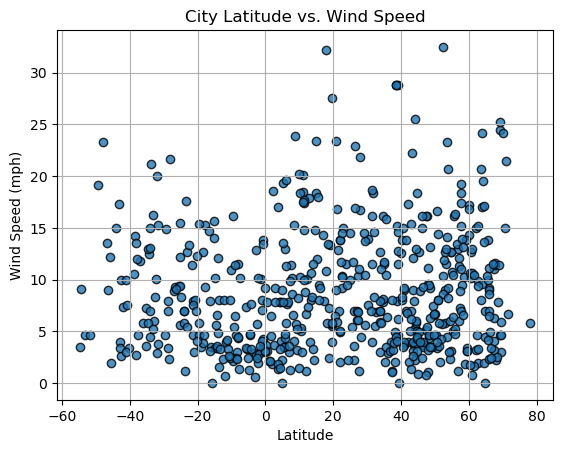

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kp/Git/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    reg_values = x_values * slope + intercept
    
    # Create figure
    plt.figure(figsize=(10, 7))
    
    # Build scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, alpha=0.8)
    
    # Add regression line
    plt.plot(x_values, reg_values, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Labels and Titles
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    plt.annotate(f'R-squared = {r_value**2:.2f}',
                 xy=(0.05, 0.95),
                 xycoords='axes fraction',
                 fontsize=12)
                 
    # Add a legend
    plt.legend()
    
    # Return slope and r-squared value
    return slope, r_value**2
    
    # Layout adjust
    plt.tight_layout()
    
    plt.show()
    


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st. john's,47.5649,-52.7093,30.27,92,100,16.11,CA,1743789578
4,weno,7.4515,151.8468,77.88,91,100,11.41,FM,1743789582
7,sandnessjoen,66.0217,12.6316,33.91,93,40,9.22,NO,1743789586
8,anadyr,64.7500,177.4833,16.30,86,75,4.47,RU,1743789587
12,changji,44.0167,87.3167,56.19,26,0,2.24,CN,1743789592


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,46.87,99,100,19.17,TF,1743789577
2,hithadhoo,-0.6000,73.0833,82.72,72,91,3.51,MV,1743789579
3,edinburgh of the seven seas,-37.0676,-12.3116,66.29,92,32,11.77,SH,1743789580
5,lodja,-3.4833,23.4333,72.37,98,98,2.86,CD,1743789584
6,puerto baquerizo moreno,-0.9000,-89.6000,85.19,74,40,8.05,EC,1743789581


###  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere - Max Temp vs. Latitude:
The slope of the linear regression line is -1.0551
The R-squared Value is: 0.7297
This means there is a 72.97% correlation between latitude and max temperature


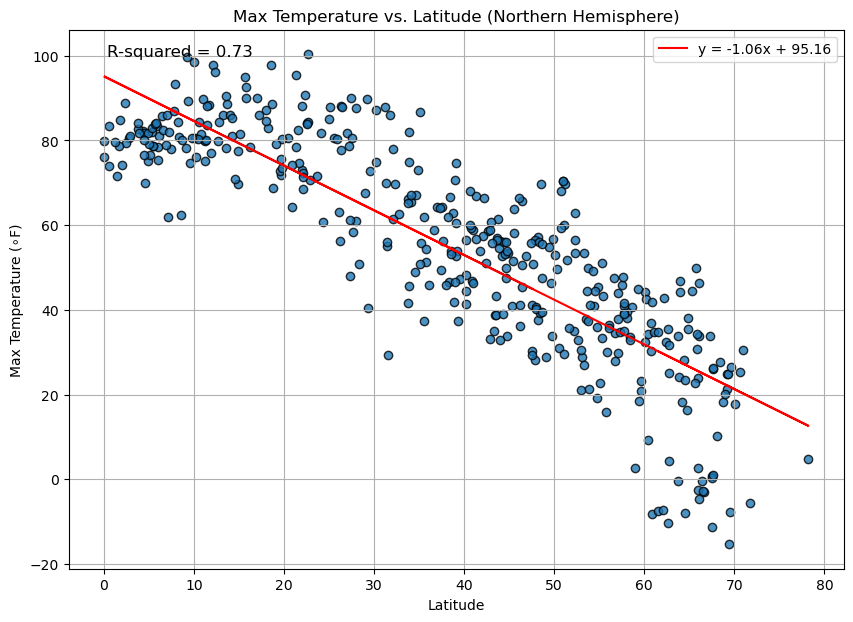

In [53]:
# Linear regression on Northern Hemisphere
slope_nh, r_squared_nh = plot_linear_regression(
    x_values=northern_hemi_df["Lat"],
    y_values=northern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (∘F)",
    title="Max Temperature vs. Latitude (Northern Hemisphere)"
)
print("Northern Hemisphere - Max Temp vs. Latitude:")
print(f"The slope of the linear regression line is {slope_nh:.4f}")
print(f"The R-squared Value is: {r_squared_nh:.4f}")
print(f"This means there is a {r_squared_nh*100:.2f}% correlation between latitude and max temperature")



Southern Hemisphere - Max Temp vs. Latitude:
The slope of the linear regression line is 0.6277
The R-squared Value is: 0.5646
This means there is a 56.46% correlation between latitude and max temperature


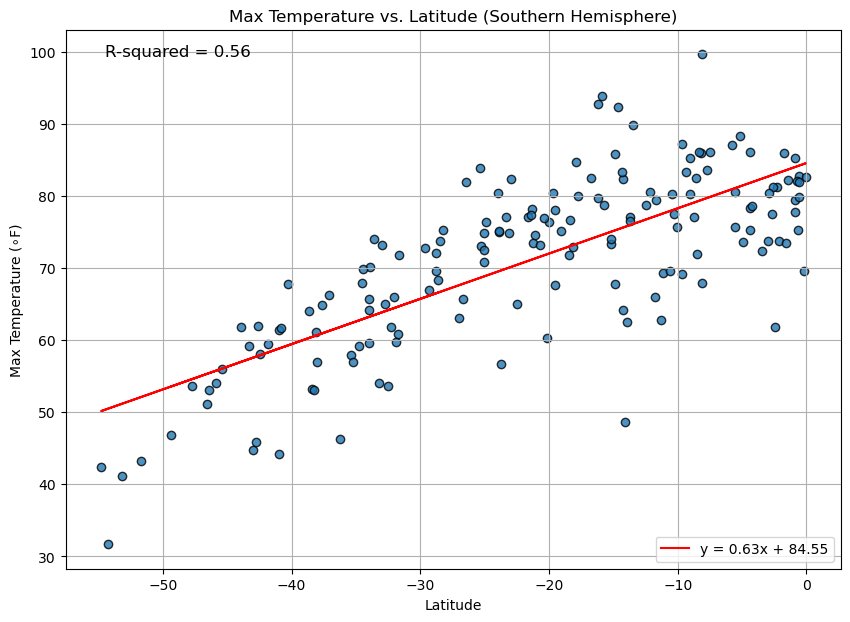

In [54]:
# Linear regression on Southern Hemisphere
slope_sh, r_squared_sh = plot_linear_regression(
    x_values=southern_hemi_df["Lat"],
    y_values=southern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (∘F)",
    title="Max Temperature vs. Latitude (Southern Hemisphere)"
)
print("Southern Hemisphere - Max Temp vs. Latitude:")
print(f"The slope of the linear regression line is {slope_sh:.4f}")
print(f"The R-squared Value is: {r_squared_sh:.4f}")
print(f"This means there is a {r_squared_sh*100:.2f}% correlation between latitude and max temperature")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere - Humidity vs. Latitude:
The slope of the linear regression line is 0.2364
The R-squared Value is: 0.0455
This means there is a 4.55% correlation between Latitude and Humidity


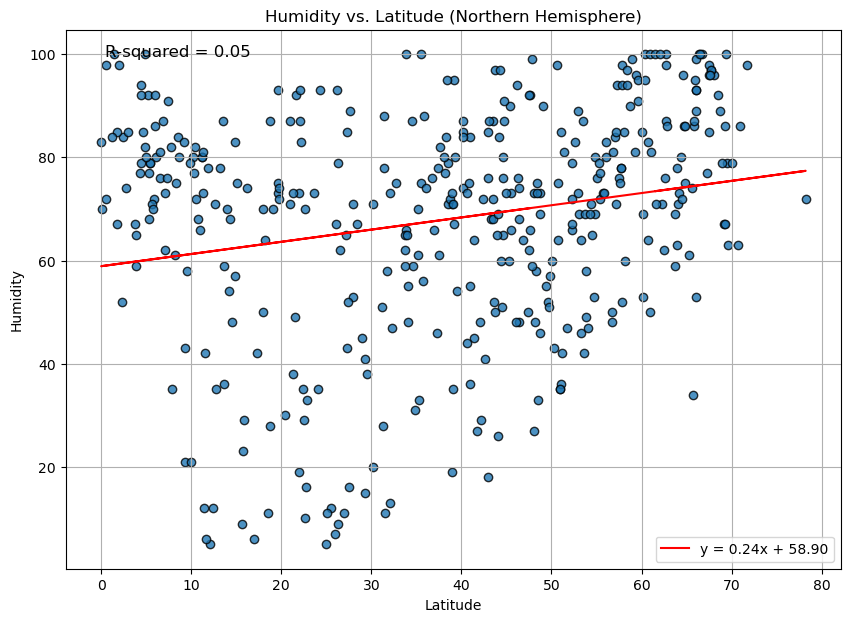

In [58]:
# Northern Hemisphere
slope_nh, r_squared_nh = plot_linear_regression(
    x_values=northern_hemi_df["Lat"],
    y_values=northern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Humidity vs. Latitude (Northern Hemisphere)"
)
print("Northern Hemisphere - Humidity vs. Latitude:")
print(f"The slope of the linear regression line is {slope_nh:.4f}")
print(f"The R-squared Value is: {r_squared_nh:.4f}")
print(f"This means there is a {r_squared_nh*100:.2f}% correlation between Latitude and Humidity")


Southern Hemisphere - Humidity vs. Latitude:
The slope of the linear regression line is 0.2479
The R-squared Value is: 0.0378
This means there is a 3.78% correlation between latitude and humidity


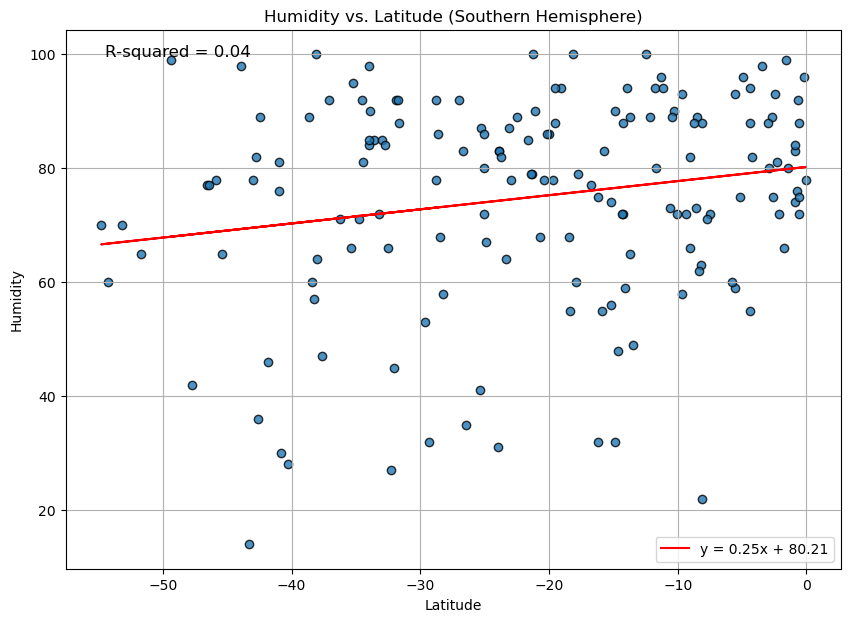

In [ ]:
# Southern Hemisphere
slope_sh, r_squared_sh = plot_linear_regression(
    x_values=southern_hemi_df["Lat"],
    y_values=southern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Humidity vs. Latitude (Southern Hemisphere)"
)
print("Southern Hemisphere - Humidity vs. Latitude:")
print(f"The slope of the linear regression line is {slope_sh:.4f}")
print(f"The R-squared Value is: {r_squared_sh:.4f}")
print(f"This means there is a {r_squared_sh*100:.2f}% correlation between Latitude and Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere - Cloudiness vs. Latitude:
The slope of the linear regression line is 0.2226
The R-squared Value is: 0.0139
This means there is a 1.39% correlation between Latitude and Cloudiness


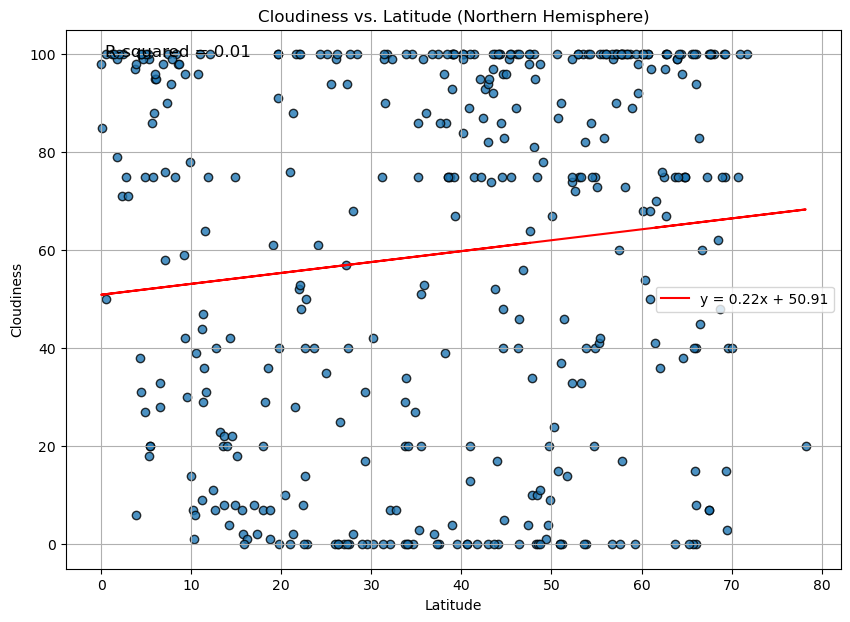

In [59]:
# Northern Hemisphere
slope_nh, r_squared_nh = plot_linear_regression(
    x_values=northern_hemi_df["Lat"],
    y_values=northern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Cloudiness vs. Latitude (Northern Hemisphere)"
)
print("Northern Hemisphere - Cloudiness vs. Latitude:")
print(f"The slope of the linear regression line is {slope_nh:.4f}")
print(f"The R-squared Value is: {r_squared_nh:.4f}")
print(f"This means there is a {r_squared_nh*100:.2f}% correlation between Latitude and Cloudiness")


Southern Hemisphere - Cloudiness vs. Latitude:
The slope of the linear regression line is 0.5018
The R-squared Value is: 0.0456
This means there is a 4.56% correlation between Latitude and Cloudiness


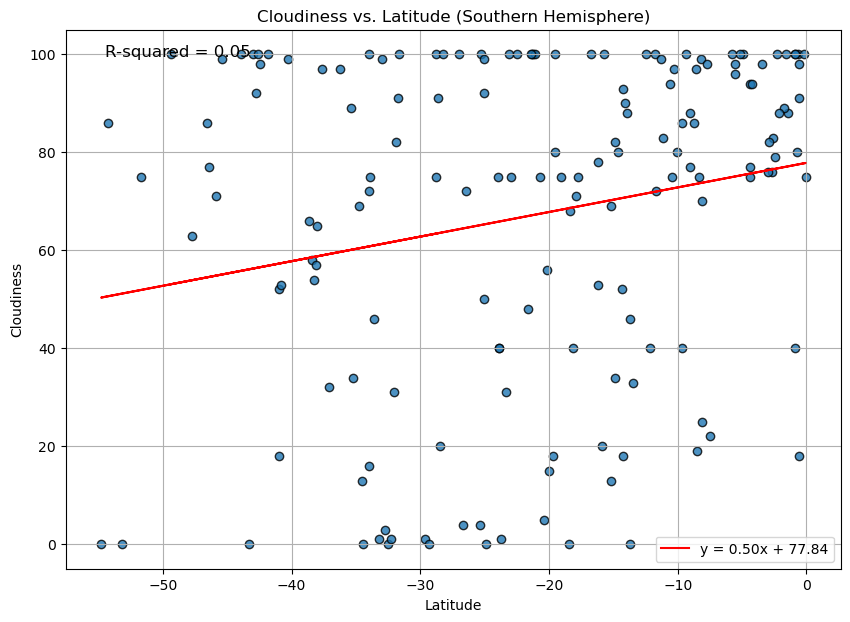

In [60]:
# Southern Hemisphere
slope_sh, r_squared_sh = plot_linear_regression(
    x_values=southern_hemi_df["Lat"],
    y_values=southern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Cloudiness vs. Latitude (Southern Hemisphere)"
)
print("Southern Hemisphere - Cloudiness vs. Latitude:")
print(f"The slope of the linear regression line is {slope_sh:.4f}")
print(f"The R-squared Value is: {r_squared_sh:.4f}")
print(f"This means there is a {r_squared_sh*100:.2f}% correlation between Latitude and Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere - Wind Speed vs. Latitude:
The slope of the linear regression line is 0.0062
The R-squared Value is: 0.0004
This means there is a 0.04% correlation between Latitude and Wind Speed


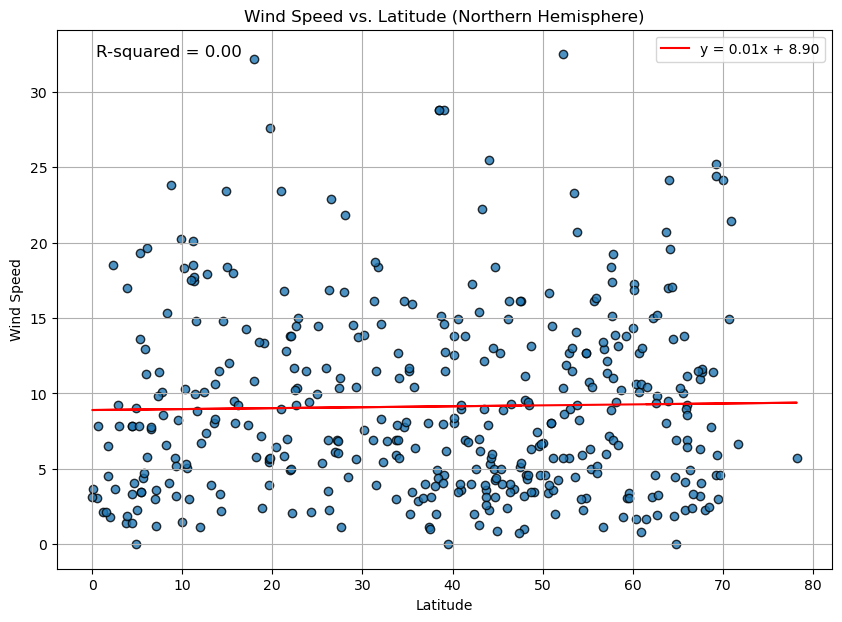

In [61]:
# Northern Hemisphere
slope_nh, r_squared_nh = plot_linear_regression(
    x_values=northern_hemi_df["Lat"],
    y_values=northern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Wind Speed vs. Latitude (Northern Hemisphere)"
)
print("Northern Hemisphere - Wind Speed vs. Latitude:")
print(f"The slope of the linear regression line is {slope_nh:.4f}")
print(f"The R-squared Value is: {r_squared_nh:.4f}")
print(f"This means there is a {r_squared_nh*100:.2f}% correlation between Latitude and Wind Speed")


Southern Hemisphere - Wind Speed vs. Latitude:
The slope of the linear regression line is -0.1025
The R-squared Value is: 0.0892
This means there is a 8.92% correlation between Latitude and Wind Speed


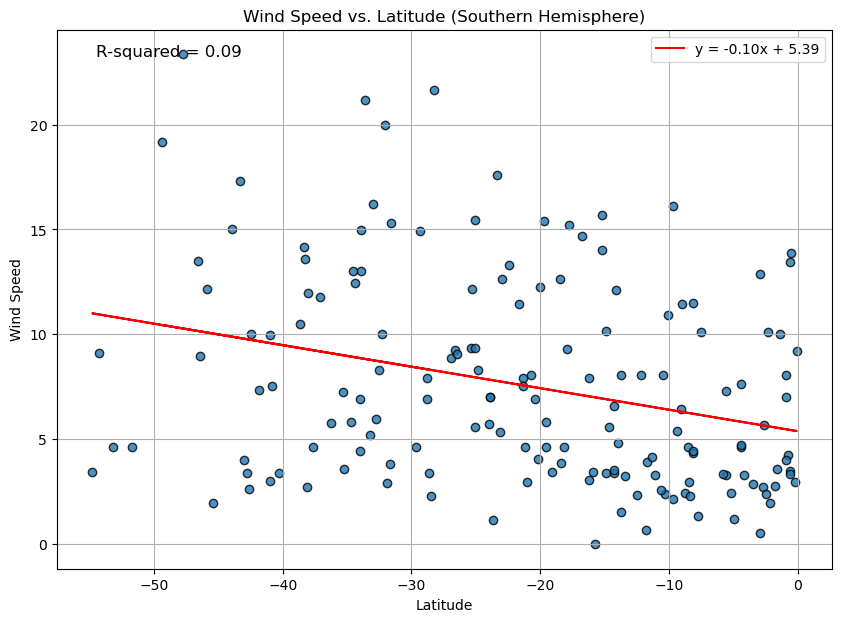

In [62]:
# Southern Hemisphere
slope_sh, r_squared_sh = plot_linear_regression(
    x_values=southern_hemi_df["Lat"],
    y_values=southern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Wind Speed vs. Latitude (Southern Hemisphere)"
)
print("Southern Hemisphere - Wind Speed vs. Latitude:")
print(f"The slope of the linear regression line is {slope_sh:.4f}")
print(f"The R-squared Value is: {r_squared_sh:.4f}")
print(f"This means there is a {r_squared_sh*100:.2f}% correlation between Latitude and Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE